<a href="https://colab.research.google.com/github/Rezki-Ramzi/Deep-learning-/blob/main/GRU_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from keras.layers import Dense, Dropout, GRU #, LSTM
from keras.optimizers import SGD, Adam
from keras.models import Sequential

# I- IBM dataset:

In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/archive/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [ ]:
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [167.74],
       [166.99],
       [166.7 ]])

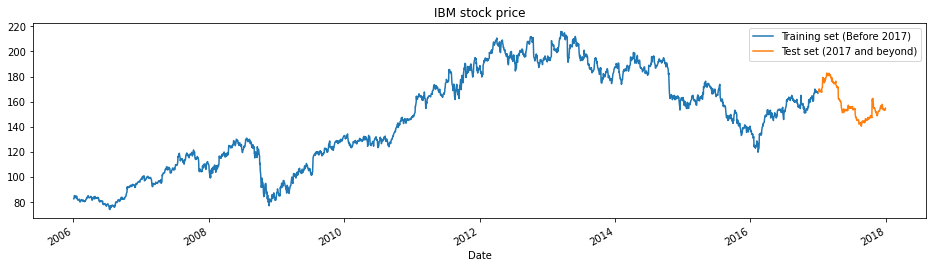

In [ ]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
memo = 60
for i in range(memo,len(training_set)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(2709, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(2709, 60, 1)

In [ ]:
# The GRU architecture
model = Sequential()
# First GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))



In [ ]:
# Compiling the GRU
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 60, 50)            7950      
                                                                 
 dropout_24 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_25 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_25 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_26 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_27 (GRU)                (None, 50)               

In [ ]:
# Training the GRU
history = model.fit(X_train,
                 y_train,
                 epochs=100,
                 batch_size=132,
          validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 9s 132ms/step - loss: 0.0938 - val_loss: 0.0196
Epoch 2/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0180 - val_loss: 0.0032
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0075 - val_loss: 0.0012
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 8.1348e-04
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0049 - val_loss: 0.0010
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0047 - val_loss: 5.4984e-04
Epoch 7/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0046 - val_loss: 7.9145e-04
Epoch 8/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0044 - val_loss: 5.8318e-04
Epoch 9/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0044 - val_loss: 5.5847e-04
Epoch 10/100
17/17 [==============================] - 0s 18ms/step - loss: 0.00

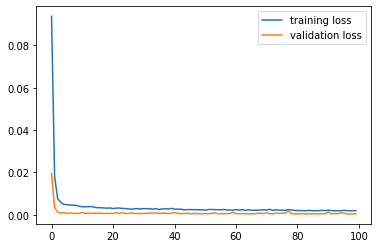

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - memo:].values
inputs = inputs.reshape(-1,1)

inputs  = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(memo,len(inputs)):
    X_test.append(inputs[i-memo:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 9ms/step


In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

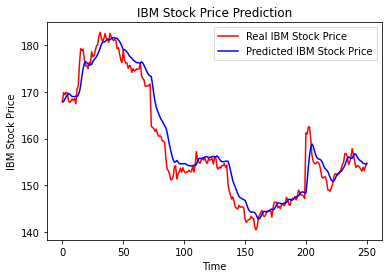

In [ ]:
plot_predictions(test_set,predicted_stock_price)

## II- Oil price:

In [ ]:
dataset2 = pd.read_csv('/content/BrentOilPrices.csv', index_col='Date', parse_dates=['Date'])
dataset2.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [ ]:
training_set2 = dataset2[:'2018'].iloc[:,0].values
test_set2 = dataset2['2018':].iloc[:,0].values

In [ ]:
test_set2

array([66.65, 67.85, 68.73, ..., 94.25, 96.37, 93.59])

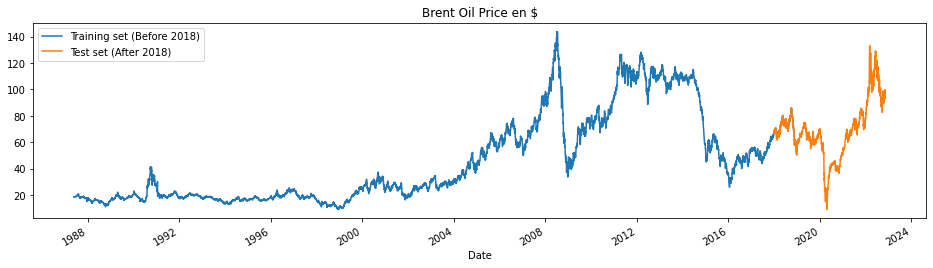

In [ ]:
dataset2["Price"][:'2018'].plot(figsize=(16,4),legend=True)
dataset2["Price"]['2018':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2018)','Test set (After 2018)'])
plt.title('Brent Oil Price en $')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set2 = training_set2.reshape(-1,1)
training_set_scaled2 = sc.fit_transform(training_set2)

In [ ]:
X_train2 = []
y_train2 = []
memo = 60
for i in range(memo,len(training_set2)):
    X_train2.append(training_set_scaled2[i-60:i,0])
    y_train2.append(training_set_scaled2[i,0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

In [ ]:
X_train2.shape

(7964, 60)

In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0],X_train2.shape[1],1))

In [ ]:
X_train2.shape

(7964, 60, 1)

In [ ]:
# The GRU architecture
model2 = Sequential()
# First GRU layer 
model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train2.shape[1],1), activation='tanh'))
model2.add(Dropout(0.2))
# Second GRU layer
model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train2.shape[1],1), activation='tanh'))
model2.add(Dropout(0.2))
# Third GRU layer
model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train2.shape[1],1), activation='tanh'))
model2.add(Dropout(0.2))
# Fourth GRU layer
model2.add(GRU(units=50, activation='tanh'))
model2.add(Dropout(0.2))
# The output layer
model2.add(Dense(units=1))


In [ ]:
model2.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_32 (GRU)                (None, 60, 50)            7950      
                                                                 
 dropout_32 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_33 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_33 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_34 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_34 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_35 (GRU)                (None, 50)               

In [ ]:
# Fitting to the training set
history2 = model2.fit(X_train2,
                 y_train2,
                 epochs=100,
                 batch_size=132,
                validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 7s 658ms/step - loss: 0.0655 - val_loss: 0.0444
Epoch 2/100
3/3 [==============================] - 0s 85ms/step - loss: 0.0192 - val_loss: 0.0091
Epoch 3/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0191 - val_loss: 0.0020
Epoch 4/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0062 - val_loss: 0.0148
Epoch 5/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0082 - val_loss: 0.0099
Epoch 6/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0045 - val_loss: 9.5179e-04
Epoch 7/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0041 - val_loss: 0.0087
Epoch 8/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0046 - val_loss: 9.3453e-04
Epoch 9/100
3/3 [==============================] - 0s 84ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 11/1

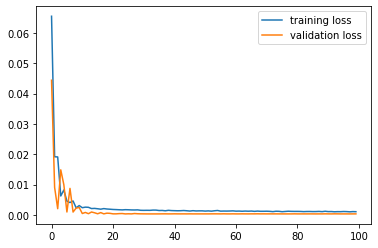

In [ ]:
plt.plot(history2.history['loss'], label = 'training loss')
plt.plot(history2.history['val_loss'], label ='validation loss')
plt.legend()

In [ ]:
dataset_total2 = pd.concat((dataset["Price"][:'2018'],dataset["Price"]['2018':]),axis=0)
inputs2 = dataset_total2[len(dataset_total2)-len(test_set2) - memo:].values
inputs2 = inputs2.reshape(-1,1)

inputs2  = sc.transform(inputs2)

In [ ]:
inputs2

array([[0.56618465],
       [0.57078235],
       [0.56373749],
       ...,
       [0.63144234],
       [0.64716352],
       [0.62654802]])

In [ ]:
X_test2 = []
for i in range(memo,len(inputs2)):
    X_test2.append(inputs2[i-memo:i,0])
X_test2 = np.array(X_test2)
#X_test2 = np.reshape(X_test2, (X_test2.shape[0],X_test2.shape[1],1))
predicted_oil_price = model2.predict(X_test2)
predicted_oil_price = sc.inverse_transform(predicted_oil_price)

39/39 [==============================] - 2s 9ms/step


In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Brent Oil Price')
    plt.plot(predicted, color='blue',label='Predicted Brent Oil Price')
    plt.title('Brent Oil Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Brent Oil Price Price')
    plt.legend()
    plt.show()

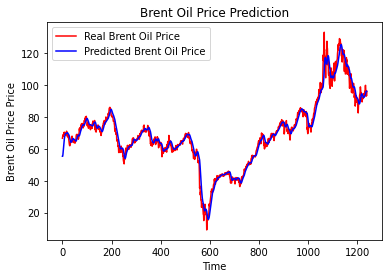

In [ ]:
plot_predictions(test_set2,predicted_oil_price)